In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np


In [4]:
DATA_PATH = r'C:\Users\Goldian\Desktop\reinforcement_task-master\data//'

In [5]:
from google.colab import drive
drive.mount('./gdrive')
from pathlib import Path

data_dir = Path('/content/gdrive/MyDrive/rl_data/data')

ModuleNotFoundError: No module named 'google'

In [ ]:
DATA_PATH = data_dir

NameError: name 'data_dir' is not defined

In [ ]:
train_path = DATA_PATH / 'train.xlsx'
test_path = DATA_PATH / 'test.xlsx'
CHMF_path = DATA_PATH / 'CHMF Акции.csv'
MAGN_path = DATA_PATH / 'MAGN Акции.csv'
NLMK_path = DATA_PATH / 'NLMK Акции.csv'
cargo_path = DATA_PATH / 'Грузоперевозки.xlsx'
build_market_path = DATA_PATH / 'Данные рынка стройматериалов.xlsx'
LME_path = DATA_PATH / 'Индекс LME.xlsx'
macro_path = DATA_PATH / 'Макропоказатели.xlsx'
metall_path = DATA_PATH / 'Показатели рынка металла.xlsx'
fuel_path = DATA_PATH / 'Топливо.xlsx'
raw_path = DATA_PATH / 'Цены на сырье.xlsx'

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [7]:
train_path = DATA_PATH + 'train.xlsx'
test_path = DATA_PATH + 'test.xlsx'
CHMF_path = DATA_PATH + 'CHMF Акции.csv'
MAGN_path = DATA_PATH + 'MAGN Акции.csv'
NLMK_path = DATA_PATH + 'NLMK Акции.csv'
cargo_path = DATA_PATH + 'Грузоперевозки.xlsx'
build_market_path = DATA_PATH + 'Данные рынка стройматериалов.xlsx'
LME_path = DATA_PATH + 'Индекс LME.xlsx'
macro_path = DATA_PATH + 'Макропоказатели.xlsx'
metall_path = DATA_PATH + 'Показатели рынка металла.xlsx'
fuel_path = DATA_PATH + 'Топливо.xlsx'
raw_path = DATA_PATH + 'Цены на сырье.xlsx'

In [156]:
train = pd.read_excel(train_path)
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   Цена на арматуру  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB
None


,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300


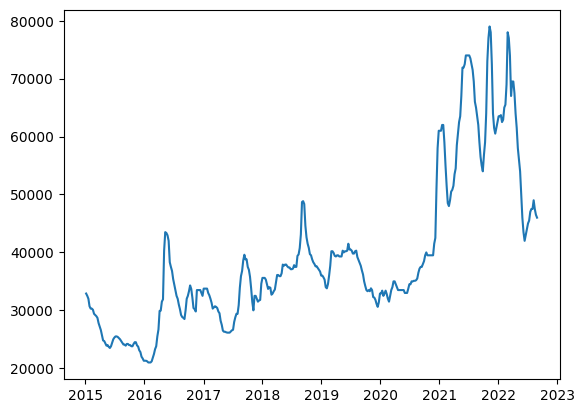

In [144]:
plt.plot(train['dt'], train['Цена на арматуру'])

Clean and join
---
+ CHMF_path = DATA_PATH / 'CHMF Акции.csv' +
+ MAGN_path = DATA_PATH / 'MAGN Акции.csv' +
+ NLMK_path = DATA_PATH / 'NLMK Акции.csv' +
+ cargo_path = DATA_PATH / 'Грузоперевозки.xlsx' +
+ build_market_path = DATA_PATH / 'Данные рынка стройматериалов.xlsx' +
+ LME_path = DATA_PATH / 'Индекс LME.xlsx' +
+ macro_path = DATA_PATH / 'Макропоказатели.xlsx' +
+ metall_path = DATA_PATH / 'Показатели рынка металла.xlsx' +
+ fuel_path = DATA_PATH / 'Топливо.xlsx' +
+ raw_path = DATA_PATH / 'Цены на сырье.xlsx' +

In [145]:
def processing_data_stocks(df, label=''):
  df['Date'] = pd.to_datetime(df['Date'])
  try:
    df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
    # df['Open'] = pd.to_numeric(df['Open'].str.replace(',', ''))
    # df['Low'] = pd.to_numeric(df['Low'].str.replace(',', ''))
    # df['High'] = pd.to_numeric(df['High'].str.replace(',', ''))
  except AttributeError:
    pass

  df = df.drop(columns=['Vol.', 'Change %', 'Open', 'Low', 'High'])
  df = df.rename(columns={'Price': f'{label} price', 'Date': 'dt'})
  return df

In [146]:
CHMF = pd.read_csv(CHMF_path)
NLMK = pd.read_csv(NLMK_path)

CHMF = processing_data_stocks(CHMF, 'CHMF')
CHMF.set_index('dt', inplace=True)
NLMK = processing_data_stocks(NLMK, 'NLMK')
NLMK.set_index('dt', inplace=True)

In [147]:
MAGN = pd.read_csv(MAGN_path)

MAGN['Дата'] = pd.to_datetime(MAGN['Дата'])
MAGN['Цена'] = pd.to_numeric(MAGN['Цена'].str.replace(',', '.'))
# MAGN['Откр.'] = pd.to_numeric(MAGN['Откр.'].str.replace(',', '.'))
# MAGN['Мин.'] = pd.to_numeric(MAGN['Мин.'].str.replace(',', '.'))
# MAGN['Макс.'] = pd.to_numeric(MAGN['Макс.'].str.replace(',', '.'))

MAGN.rename(columns={'Цена': 'MAGN цена', 'Дата': 'dt'}, inplace=True)
MAGN = MAGN.drop(columns=['Объём', 'Изм. %', 'Откр.', 'Мин.', 'Макс.'])
MAGN.set_index('dt', inplace=True)

C:\Users\Goldian\AppData\Local\Temp\ipykernel_2912\3537250460.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  MAGN['Дата'] = pd.to_datetime(MAGN['Дата'])


In [148]:
cargo = pd.read_excel(cargo_path)
cargo.set_index('dt', inplace=True)
build_market = pd.read_excel(build_market_path)
build_market.set_index('dt', inplace=True)
metall = pd.read_excel(metall_path)
metall.set_index('dt', inplace=True)
fuel = pd.read_excel(fuel_path)
fuel.set_index('dt', inplace=True)
raw = pd.read_excel(raw_path)
raw.set_index('dt', inplace=True)

In [149]:
LME = pd.read_excel(LME_path)
LME['цена'] = pd.to_numeric(LME['цена'].replace(',', '.'), errors='coerce')
LME.rename(columns={'цена': 'Index LME'}, inplace=True)
LME.set_index('дата', inplace=True)

In [150]:
macro = pd.read_excel(macro_path)
macro = macro.drop(columns=['Базовый индекс потребительских цен на товары и услуги'])
macro.set_index('dt', inplace=True)

In [159]:
all_data = [CHMF, NLMK, MAGN, cargo, build_market, metall, fuel, raw, LME, macro]

In [176]:
train = pd.read_excel(train_path)
train.set_index('dt', inplace=True)

In [177]:
for data in all_data:
    train = train.join(data, how='left')

In [185]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(train.isna().sum())

Цена на арматуру                                                                                      0
CHMF price                                                                                          222
NLMK price                                                                                          223
MAGN цена                                                                                           238
Индекс стоимости грузоперевозок                                                                     400
Импорт цемента ЖД                                                                                   397
Экспорт цемента ЖД                                                                                  397
Отгрузка цемента хоппер ЖД                                                                          397
Отгрузка цемента остальные ЖД                                                                       397
Производство цемента                                            

In [206]:
def remove_multicollinearity(df, threshold=1):
    # Найдем коррелюция среди признаков
    corr_matrix = df.corr().abs()

    # Создадим логическую маску для идентификации признаков
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Найдем признаки с прямой корреляцией
    correlated_features = corr_matrix.mask(mask).stack().reset_index()
    correlated_features = correlated_features[correlated_features[0] >= threshold]
    cols_to_drop = correlated_features['level_0'].unique()
    print(cols_to_drop)

    df = df.drop(cols_to_drop, axis=1)

    return df


In [207]:
clean_data = remove_multicollinearity(train)
print(clean_data.shape)
clean_data.head()

['Импорт цемента ЖД' 'Экспорт цемента ЖД' 'Отгрузка цемента хоппер ЖД'
 'Отгрузка цемента остальные ЖД' 'Производство цемента' 'Импорт цемента'
 'Экспорт цемента' 'Потребление цемента' 'Отгрузка цемента'
 'Цена цемента с НДС' 'Цена цемента без НДС' 'Производство бетона РФ'
 'Производство бетона МО' 'Производство бетона СПБ' 'Спрос ЖРС_Агломерат'
 'Спрос ЖРС_Аглоруда' 'Спрос Концентрат коксующегося угля_Отощающие'
 'Лом_3А, РФ CPT авто Центральный ФО, руб./т, без НДС'
 'Лом_3А, РФ CPT авто Уральский ФО, руб./т, без НДС'
 'Лом_3А, РФ CPT авто Южный ФО, руб./т, без НДС'
 'ГБЖ_Россия, FCA руб./т, без НДС' 'Index LME']
(400, 140)


,Цена на арматуру,CHMF price,NLMK price,MAGN цена,Индекс стоимости грузоперевозок,Производство арматуры Сортовой прокат_Арматура,Производство арматуры Сортовой прокат_Катанка,Производство арматуры Сортовой прокат_Прутки прочие,Производство сырья ЖРС_Агломерат,Производство сырья ЖРС_Аглоруда,...,"ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в концентрате, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в окатыши, Россия FCA руб./т, без НДС","ЖРС_Украинский концентрат Fe 65-68%, DAP граница Украины с Европой, $/т","ЖРС_Украинские окатыши Fe 65-66%, DAP граница Украины с Европой, $/т",Ключевая ставка,Курс доллара
dt,,,,,,,,,,,,,,,,,,,,,
2015-01-05,32900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-12,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-19,32000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-26,30700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-02,30300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
clean_data.to_csv('train_dataframe.csv')